# Descripción del set de datos

El set de datos que se escogió consiste en observaciones meteorológicas diarias de varias estaciones meteorológicas australianas.

La variable que se desea predecir es si llovió al día siguiente o no.

El set de datos se descargó del siguiente sitio web:

https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

# Pre-procesado de los datos

El primer paso es importar las librerías numpy y pandas.

In [1]:
import numpy
import pandas

Luego se lee el set de datos descargado y se guarda en la variable "data".

In [2]:
data = pandas.read_csv('weatherAUS.csv', delimiter = ',')
data.shape

(142193, 24)

In [3]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


Se puede notar que el set de datos tiene muchos features que no son necesarios para los algoritmos de aprendizaje, así que hay que eliminar varias columnas.

In [4]:
cols_to_drop = ['Date','Location','RISK_MM']
data = data.drop(columns=cols_to_drop)
data.shape

(142193, 21)

Ahora se revisa cuántos NaN hay en cada feature del set de datos. 

In [5]:
data.isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

Del análisis anterior se puede ver que hay 4 features en los que aproximadamente la mitad de las entradas son NaN, por lo que se procede a eliminar esas columnas.

In [6]:
cols_to_drop = ['Evaporation','Sunshine','Cloud9am','Cloud3pm']
data = data.drop(columns=cols_to_drop)
data.shape

(142193, 17)

Ahora se van a quitar todas las filas que tengan algun NaN.

In [7]:
data = data.dropna()
data.shape

(112925, 17)

In [8]:
data.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


El siguiente paso es mapear todos los valores que no son numéricos a valores numéricos con los que los algoritmos puedan trabajar.

In [9]:
data['RainToday'] = data['RainToday'].map({'No':0, 'Yes':1})
data['RainTomorrow'] = data['RainTomorrow'].map({'No':0, 'Yes':1})

In [10]:
data['WindGustDir'] = data['WindGustDir'].astype("category").cat.codes
data['WindDir3pm'] = data['WindDir3pm'].astype("category").cat.codes
data['WindDir9am'] = data['WindDir9am'].astype("category").cat.codes
data.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


Ahora se va a realizar un escalamiento de los datos con la funcion MinMaxEscaler().

In [11]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaler.fit(data)
data = pandas.DataFrame(scaler.transform(data), index=data.index, columns=data.columns)

# Separando set de entrenamiento y set de pruebas

Ahora se procede a separar los features de los labels.

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
features = data.drop(columns='RainTomorrow')
labels = data['RainTomorrow']

Se puede notar que el set de datos aún tiene muchos features y esto puede ser un problema en cuanto al tiempo de procesamiento que van a tardar los métodos de aprendize en entrenarse.

Para solucionar ese problema, se van a tomar solo los 10 features con mayor importancia para la generalización. 

In [14]:
from sklearn.feature_selection import SelectKBest, chi2

In [15]:
selector = SelectKBest(chi2, k=10)
selector.fit(features, labels)
features = selector.transform(features)
features.shape

(112925, 10)

Ahora se obtienen el set de datos de entrenamiento y el set de datos de prueba.

In [16]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, random_state=13)

In [17]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(84693, 10)
(28232, 10)
(84693,)
(28232,)


# Logistic Regression

El primer método que se va a utilizar es el de logistic regression.

In [18]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline
import threading

Se agregó la librería "threading" para poder ejecutar las diferentes iteraciones del método de apredizaje en hilos independientes y poder optimizar el tiempo de procesamiento.

Para este modelo se genera una curva con diferentes valores del hiper parámetro C, que controla el nivel de regularización.

In [24]:
training_acc = []
test_acc = []
rango = numpy.arange(0.01, 1, 0.01)

def train_model():
    # Modelo de clasificacion
    model = LogisticRegression(C=c, solver='liblinear')
    model.fit(x_train, y_train)
    # Se almacena el "training accuracy"
    training_acc.append(model.score(x_train, y_train))
    # Se almacena el "test accuracy"
    test_acc.append(model.score(x_test, y_test))
    
for c in rango:
    threading.Thread(target=train_model).start()

Los valores que se eligieron en el código anterior para el rango de C, fueron escogidos después de probar diferentes rangos.

Ahora se grafican los valores de los scores con respecto al hiper parámetro C.

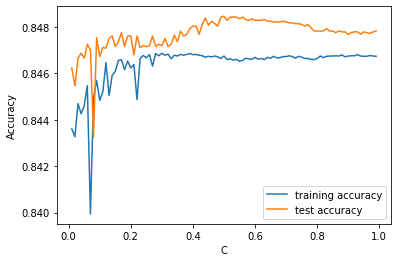

In [21]:
plt.plot(rango, training_acc, label="training accuracy")
plt.plot(rango, test_acc, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.legend()

Con los valores de score obtenidos anteriormente, se escoge los que dan un mejor resultado.

In [22]:
best_test_accuracy = max(test_acc)
parameter = rango[test_acc.index(best_test_accuracy)]
training_accuracy = training_acc[test_acc.index(best_test_accuracy)]
print("Best test accuracy = " + str(best_test_accuracy))
print("Training accuracy = " + str(training_accuracy))
print("Parameter C = " + str(parameter))

Best test accuracy = 0.8484698214791726
Training accuracy = 0.8467523880367918
Parameter C = 0.5


Se puede concluir que por la complejidad del set de datos, el valor optimo de C fue muy bajo y por lo tanto el modelo tuvo que hacer bastante regularización.

# k Nearest Neighbors (kNN)

El segundo método a utilizar es el de los vecinos más cercanos.

In [26]:
from sklearn.neighbors import KNeighborsClassifier

En este caso el hiper parámetro que se va a variar es "n_neighbors", que es la cantidad de vecinos cercanos que 
usa el modelo para tomar la decisión.

Se va a usar un rango de 1 a 100.

In [27]:
training_acc = []
test_acc = []
rango = range(1, 100, 10)

def train_model():
    # Modelo de clasificacion
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    # Se almacena el "training accuracy"
    training_acc.append(model.score(x_train, y_train))
    # Se almacena el "test accuracy"
    test_acc.append(model.score(x_test, y_test))
    
for k in rango:
    threading.Thread(target=train_model).start()

Ahora se grafican los resultados.

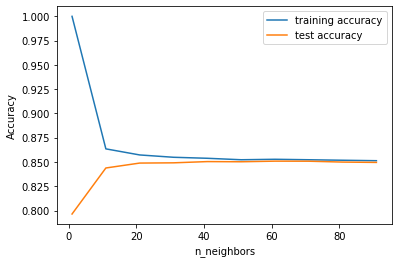

In [29]:
plt.plot(rango, training_acc, label="training accuracy")
plt.plot(rango, test_acc, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

Del gráfico anterior se puede ver que alrededor de n_neighbors = 50 ya se obtienen las mejores precisiones en los sets de entrenamiento y de prueba. 

In [31]:
# se construye el modelo de clasificacion
model = KNeighborsClassifier(n_neighbors=50)
model.fit(x_train, y_train)
print("Training score: " + str(model.score(x_train, y_train)))
print("Test score: " + str(model.score(x_test, y_test)))

Training score: 0.8526324489627242
Test score: 0.850559648625673


# naive Bayes

El tercer método que se escogió es el de naive Bayes de tipo Gaussiano.

In [32]:
from sklearn.naive_bayes import GaussianNB

Para este método el hiper parámetro a modificar es el suavizado de los datos (alpha). Entre más grande sea el alpha, más se simplifica el modelo.

In [33]:
training_acc = []
test_acc = []
rango = numpy.arange(0.1, 2, 0.01)

def train_model():
    # Modelo de clasificacion
    model = GaussianNB(var_smoothing=alpha)
    model.fit(x_train, y_train)
    # Se almacena el "training accuracy"
    training_acc.append(model.score(x_train, y_train))
    # Se almacena el "test accuracy"
    test_acc.append(model.score(x_test, y_test))
    
for alpha in rango:
    threading.Thread(target=train_model).start()

Se procede a graficar los resultados.

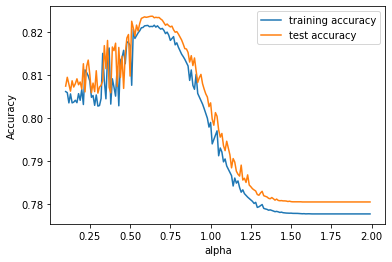

In [34]:
plt.plot(rango, training_acc, label="training accuracy")
plt.plot(rango, test_acc, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("alpha")
plt.legend()

Del grafico anterior se nota que se puede identificar facilmente el valor óptimo de alpha de la siguiente forma:

In [35]:
best_test_accuracy = max(test_acc)
parameter = rango[test_acc.index(best_test_accuracy)]
training_accuracy = training_acc[test_acc.index(best_test_accuracy)]
print("Best test accuracy = " + str(best_test_accuracy))
print("Training accuracy = " + str(training_accuracy))
print("Parameter alpha = " + str(parameter))

Best test accuracy = 0.8237461037120998
Training accuracy = 0.8213901975369865
Parameter alpha = 0.6299999999999997


# Random Forest

El cuarto método a utilizar es el random forest.

In [35]:
from sklearn.ensemble import RandomForestClassifier

Para este modelo se va a variar el hiper parámetro "n_estimators" que corresponde al número de árboles.

In [36]:
training_acc = []
test_acc = []
rango = range(1, 50, 2)

def train_model():
    # Modelo de clasificacion
    model = RandomForestClassifier(n_estimators=estimators)
    model.fit(x_train, y_train)
    # Se almacena el "training accuracy"
    training_acc.append(model.score(x_train, y_train))
    # Se almacena el "test accuracy"
    test_acc.append(model.score(x_test, y_test))
    
for estimators in rango:
    threading.Thread(target=train_model).start()

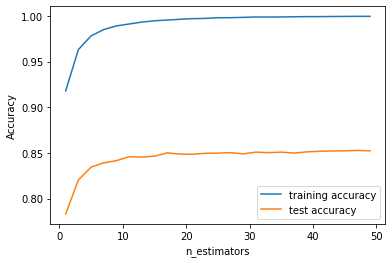

In [37]:
plt.plot(rango, training_acc, label="training accuracy")
plt.plot(rango, test_acc, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_estimators")
plt.legend()

Al analizar el gráfico anterior se puede concluir que ya con 30 árboles se obtiene la precisión óptima.

In [22]:
# se construye el modelo de clasificacion
log_reg = RandomForestClassifier(n_estimators=30)
log_reg.fit(x_train, y_train)
# se almacena el "training set accuracy"
print("Training score: " + str(log_reg.score(x_train, y_train)))
# se almacena el "test accuracy"
print("Test score: " + str(log_reg.score(x_test, y_test)))

Training score: 0.9982170899602092
Test score: 0.8501700198356474


# AdaBoost

El quinto método es el de AdaBoost. Este modelo pertenece a los modelos de tipo ensemble o conjunto.

El objetivo de los métodos ensemble es combinar las predicciones de varios modelos base construidos con un algoritmo de aprendizaje dado para mejorar la generalización en un solo modelo.

El modelo AdaBoost es un método que comienza ajustando un primer clasificador usando el conjunto de datos y luego ajusta copias adicionales de ese primer clasificador en el mismo conjunto de datos, pero para estas copias, los pesos de las instancias que se clasificaron incorrectamente se ajustan de dándoles una mayor prioridad para que la siguiente copia se centren más en casos difíciles y con esto se mejora la predicción.

In [23]:
from sklearn.ensemble import AdaBoostClassifier

In [24]:
training_acc = []
test_acc = []
rango = range(1, 100)

def train_model():
    # Modelo de clasificacion
    model = AdaBoostClassifier(n_estimators=estimators)
    model.fit(x_train, y_train)
    # se almacena el "training accuracy"
    training_acc.append(model.score(x_train, y_train))
    # se almacena el "test accuracy"
    test_acc.append(model.score(x_test, y_test))
    
for estimators in rango:
    threading.Thread(target=train_model).start()

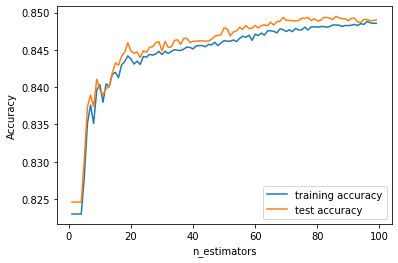

In [26]:
plt.plot(rango, training_acc, label="training accuracy")
plt.plot(rango, test_acc, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_estimators")
plt.legend()

Al ver el grafico se nota que ya con entre 80 y 100 estimadores, se obtiene una precisión óptima.

Esto se reafirma con el siguiente código en el que se obtiene el valor de n_estimators para el mejor test score.

In [29]:
best_test_accuracy = max(test_acc)
parameter = rango[test_acc.index(best_test_accuracy)]
training_accuracy = training_acc[test_acc.index(best_test_accuracy)]
print("Best test accuracy = " + str(best_test_accuracy))
print("Training accuracy = " + str(training_accuracy))
print("Parameter n_estimators = " + str(parameter))

Best test accuracy = 0.8494970246528761
Training accuracy = 0.8483345731052153
Parameter n_estimators = 86


# PassiveAggressiveClassifier

Por último se utilizó el clasificador pasivo agresivo.

In [30]:
from sklearn.linear_model import PassiveAggressiveClassifier

En este modelo se varía el parámetro C que corresponde al grado de regularización.

In [31]:
training_acc = []
test_acc = []
rango = numpy.arange(0.1, 10, 0.1)

def train_model():
    # se construye el modelo de clasificacion
    log_reg = PassiveAggressiveClassifier(C=ratio)
    log_reg.fit(x_train, y_train)
    # se almacena el "training set accuracy"
    training_acc.append(log_reg.score(x_train, y_train))
    # se almacena el "test accuracy"
    test_acc.append(log_reg.score(x_test, y_test))
    
for ratio in rango:
    threading.Thread(target=train_model).start()

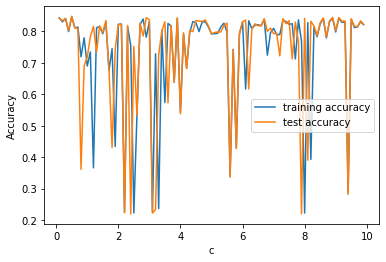

In [32]:
plt.plot(rango, training_acc, label="training accuracy")
plt.plot(rango, test_acc, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("c")
plt.legend()

Del gráfico se observa que ya sea con valores bajos o altos de regularización se obtiene casi la misma precisión, lo cual se reafirma en el siguiente código. 

In [33]:
best_test_accuracy = max(test_acc)
parameter = rango[test_acc.index(best_test_accuracy)]
training_accuracy = training_acc[test_acc.index(best_test_accuracy)]
print("Best test accuracy = " + str(best_test_accuracy))
print("Training accuracy = " + str(training_accuracy))
print("Parameter alpha = " + str(parameter))

Best test accuracy = 0.8484344006800794
Training accuracy = 0.8467760027393055
Parameter alpha = 0.5


# Análisis

Al usar todos los modelos presentados anteriormente se observaron los siguientes puntos:

Los modelos que se entrenaron más rapidamente fueron los de naive Bayes de tipo Gaussiano y el AdaBoost. Esto era algo esperado ya que el set de datos que se utilizó era bastante grande y estos modelos se desempeñan bien en grandes conjuntos de datos.

El modelo que dió la mejor presición fue el k Nearest Neighbors. Algunas de las razones por las que arrojó buenos resultados fueron que el set de datos casi no tenía ceros y que se disminuyó la cantidad de features con respecto al set de datos original. La desventaja que presentó este modelo es que fue uno de los más lentos entrenándose.

El modelo con la peor presición fue el de naive Bayes Gaussiano, y se debe a que probablemente los datos no presentaban este tipo de distribución probabilística.